In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load all the modules
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
#Note 1: please install prophet using !pip install prophet
#Note 2: please install yfinance using: !pip install yfinance

In [ ]:
#step 0: ask for user input for the desired stock symbol of interest and assign it to a variable named "stock_symbol"
#hint: we covered getting user input in the lessons
stock_symbol="AAPL"

In [ ]:
stock_symbol = input("Enter the stock symbole : ")

Enter the stock symbole : META


In [ ]:
#step 1: download the historical stock data (last 5 years) of the symbol of interest from Yahoo Finance using the yfinance API
yf_ticker=yf.Ticker(stock_symbol) #
yf_history=yf_ticker.history(period="5y")

#number of days that we want to forecast
forecast_period=180

In [ ]:
#step 2: print the first 5 rows of the dataset
#hint: use the head() function

yf_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-08-24,168.880005,169.289993,166.410004,167.740005,14030400,0,0
2017-08-25,167.860001,168.380005,166.179993,166.320007,12614500,0,0
2017-08-28,166.910004,167.699997,166.330002,167.240005,8553700,0,0
2017-08-29,165.250000,168.429993,165.000000,168.050003,11121000,0,0
2017-08-30,168.169998,170.179993,167.630005,169.919998,11138300,0,0


In [ ]:
#step 3: create a data frame called "yf_mod" with only the Close columns from the yf_history data frame
#hint: select the desired columns by using the column names. e.g. my_data_fram[["Column"]]
yf_mod=yf_history[["Close"]]

In [ ]:
#step 4: Reset the column index and rename the Date and Close columns as ds and y
yf_mod.reset_index(level=0,inplace=True)
yf_mod=yf_mod.rename({'Date':'ds','Close':'y'},axis='columns')
yf_mod.head()

,ds,y
0,2017-08-24,167.740005
1,2017-08-25,166.320007
2,2017-08-28,167.240005
3,2017-08-29,168.050003
4,2017-08-30,169.919998


In [ ]:
#Step 5: split the yf_mod data frame into training and test data frames. We will use the training data frame to build the model and test data frame for forecasting.
#We will use the last 180 days for testing purposes and the remaining dataset for training.
#hint: first count the number of rows of yf_mod using the len() or yf_mod.shape commands
#hint 2: use the iloc function in pandas to select the desired number of rows
number_rows=len(yf_mod)
yf_mod_train=yf_mod.iloc[:(number_rows-forecast_period)]

#To do: use the iloc function as aboe to only select the last 180 rows
#hint 3: yf_mod.iloc[start:end]
yf_mod_test=yf_mod.iloc[(number_rows-forecast_period):(number_rows)]

In [ ]:
#step 5: Use the fit function in prophet to build the model
m=Prophet(daily_seasonality=True)
m.fit(yf_mod_train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjilsxc1r/c8x7zf57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjilsxc1r/fqrzws55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58114', 'data', 'file=/tmp/tmpjilsxc1r/c8x7zf57.json', 'init=/tmp/tmpjilsxc1r/fqrzws55.json', 'output', 'file=/tmp/tmprv0rk113/prophet_model-20220823230753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:07:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Step 6: use the predict function in prophet to forecast prices
#hint: m.predict(name_of_the_test_data_frame)
prophet_forecast=m.predict(yf_mod_test)

In [ ]:
prophet_forecast[["trend"]].mean()

trend    387.511791
dtype: float64

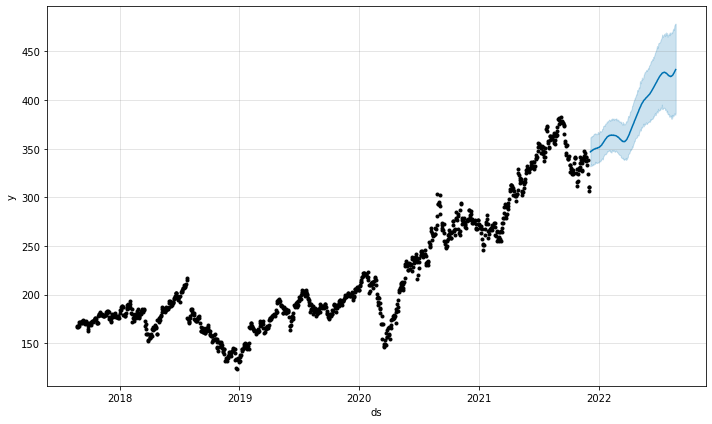

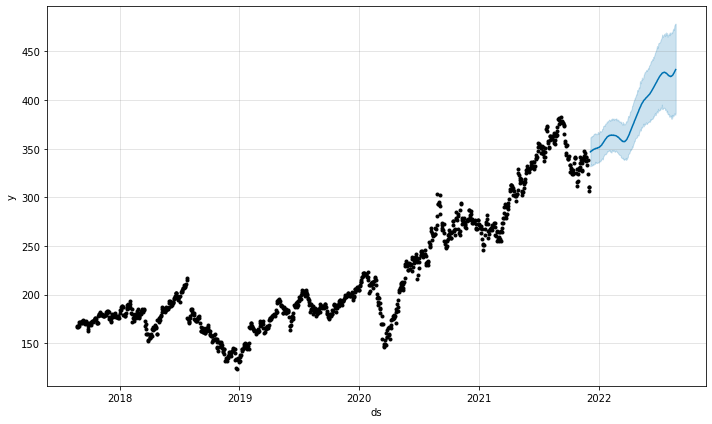

In [ ]:
#Step 7: use the plot function in prophet to visualize the time series
m.plot(prophet_forecast)

In [ ]:
#step 8: compare the performance of the prophet model with ARIMA (auto-regressive integrated moving average) model - a time-series forecasting approach
#we will create a function to get forecasted prices from the ARIMA model
def get_arima(train,period):
    arima_model=ARIMA(train,order=(2,2,1))
    arima_fit=arima_model.fit()
    arima_pred=arima_fit.forecast(period)
    return arima_pred

arima_forecast=get_arima(yf_mod_train[["y"]],period=forecast_period)


In [ ]:
#Step 9: Error calculation for the prophet model between the actual and predicted prices for the next 180 days
#Calculate the root mean square error using the mean_squared_error_function
actual=yf_mod_test[["y"]]
predicted=prophet_forecast[["trend"]]
rmse_prophet = mean_squared_error(actual,predicted,squared=False)


In [ ]:
#Step 10: Error calculation for the ARIMA model between the actual and predicted prices for the next 180 days
#Calculate the root mean square error using the mean_squared_error_function
#hint: see step 9:
actual=yf_mod_test[["y"]]
predicted=arima_forecast
rmse_arima   = mean_squared_error(actual,predicted,squared=True)


In [ ]:
#Step 11: Compare performance
print("Model RMSE for Prophet: ",rmse_prophet)
print("Model RMSE for ARIMA: ",rmse_arima)


Model RMSE for Prophet:  181.07923130709995
Model RMSE for ARIMA:  13602.877446982138
